# Guided Project: Star Wars Survey

For this guided project from [dataquest](https://www.dataquest.io/home) we will be working with the Star Wars survey data. The team at [FiveThirtyEight](https://fivethirtyeight.com/) surveyed Star Wars fans using the online tool Survey Monkey. They received 835 responses, which we can download from their [Github repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

### 1. Overview 

The following code will read the data into a pandas dataframe

In [1]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding = "ISO-8859-1")

We need to specify an **encoding** because the data set has some characters that aren't in Python's default **utf-8** encoding. For more information about encoding, check out [Joel Spolsky's blog](https://www.joelonsoftware.com/2003/10/08/the-absolute-minimum-every-software-developer-absolutely-positively-must-know-about-unicode-and-character-sets-no-excuses/).

Let us check out the first few rows of the data

In [2]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

The data has several columns, including

* **RespondentID** - An anonymized ID for the respondent (person taking the survey)
* **Gender** - The respondent's gender
* **Age** -The respondent's age
* **Household Income** -The respondent's income
* **Education**- The respondent's education level
* **Location (Census Region)** - The respondent's location
* **Have you seen any of the 6 films in the Star Wars franchise?** - Has a **Yes** or **No** response.
* **Do you consider yourself to be a fan of the Star Wars film franchise?** Has a **Yes** or **No** response.

Remove the rows where **RespondentID** is NaN

In [3]:
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]

Check the number of rows and columns

In [4]:
star_wars.shape

(1186, 38)

Let us look at the list of columns

In [5]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

### 2. Cleaning and Mapping Yes/No Columns

Convert **Have you seen any of the 6 films in the Star Wars franchise** to Boolean type

In [6]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?']=star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map({'Yes':True,'No':False}) 

In [7]:
#checking the column
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna = False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

Convert **Do you consider yourself to be a fan of the Star Wars franchise?** column to the Boolean type

In [8]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']=star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map({'Yes':True,'No':False})

In [9]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna = False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

### 3. Cleaning and Mapping Checkbox Columns

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question **Which of the following Star Wars films have you seen? Please select all that apply.**

The columns for this question are 

* **Which of the following Star Wars films have you seen? Please select all that apply**. -Whether or not the respondent saw **Star Wars: Episode I the Phantom Menace**.
* **Unamed: 4** - Whether or not the respondent saw **Star Wars: Episode II Attack of the Clones.**
* **Unamed: 5** -Whether or not the respondent saw **Star Wars: Episode III Revenge of the Sith**
* **Unamed: 6** -Whether or not the respondent saw **Star Wars: Episode IV A New Hope**
* **Unamed: 7** -Whether or not the respondent saw **Star Wars: Episode V The Empire Strikes Back**
* **Unamed: 8** -Whether or not the respondent saw **Star Wars: Episode VI Return of the Jedi**

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie. 

We'll need to convert each of these columns to a Boolean, then rename the column to somthing more intuitive.

Convert each column above so that it only contains the values **True** and **False**

Be very careful with spacing when constructing your mapping dictionary. 

In [10]:
#look at the names of the movies
star_wars.iloc[0,:]

RespondentID                                                                                                                                                                      3.29288e+09
Have you seen any of the 6 films in the Star Wars franchise?                                                                                                                             True
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                                                                    True
Which of the following Star Wars films have you seen? Please select all that apply.                                                                  Star Wars: Episode I  The Phantom Menace
Unnamed: 4                                                                                                                                        Star Wars: Episode II  Attack of the Clones
Unnamed: 5                                        

In [11]:
import numpy as np

name_map = {'Star Wars: Episode I  The Phantom Menace':True,
            'Star Wars: Episode II  Attack of the Clones': True,
            'Star Wars: Episode III  Revenge of the Sith': True,
            'Star Wars: Episode IV  A New Hope': True,
            'Star Wars: Episode V The Empire Strikes Back': True,
            'Star Wars: Episode VI Return of the Jedi': True,
             np.NaN: False}

Convert the columns to Boolean

In [12]:
for i in list(range(3,9)):
    star_wars.iloc[:,i] = star_wars.iloc[:,i].map(name_map)

In [13]:
#check the columns
star_wars.iloc[:,3:9].head()

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True


Rename the columns

In [14]:
star_wars.columns[3:9]

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [16]:
star_wars = star_wars.rename(columns = {'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1',
                                        'Unnamed: 4': 'seen_2',
                                        'Unnamed: 5': 'seen_3',
                                         'Unnamed: 6': 'seen_4',
                                         'Unnamed: 7': 'seen_5',
                                          'Unnamed: 8': 'seen_6'})

In [17]:
#check the head of the dataframe
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### 4. Cleaning the Ranking Columns

The next six columns ask the respondents to rank the Star Wars movies in order of least favorite to most favorite. **1** means the film was the most favorite and **6** means it was the least favorite. Each of the following columns can contain the value **1**, **2**, **3**, **4**, **5**, **6**, or **NaN**:

* **Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.** How much the respondent liked **Star Wars: Episode I The Phantom Menace**
* **Unnamed: 10** - How much the respondent liked **Star Wars: Episode II Attack of the Clones**
* **Unnamed: 11** - How much the respondent liked **Star Wars: Episode III Revenge of the Sith**
* **Unnamed: 12** - How much the respondent liked **Star Wars: Episode IV A New Hope**
* **Unnamed: 13** - How much the respondent liked **Star Wars: Episode V The Empire Strikes Back**
* **Unnamed: 14** - How much the respondent liked **Star Wars: Episode VI Return of the Jedi**

Fortunately these columns don't require a lot of cleanup. We'll need to convert each column to a numeric type, though, then rename the columns so that we can tell what they represent more easily.

Convert columns 9 to 15 to float type

In [19]:
star_wars.iloc[:,9:15] = star_wars.iloc[:,9:15].astype(float)

Rename columns 9 to 15

In [20]:
star_wars.columns[9:15]

Index(['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

In [21]:
star_wars = star_wars.rename(columns = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'rank_1',
                                        'Unnamed: 10':'rank_2',
                                         'Unnamed: 11':'rank_3',
                                         'Unnamed: 12':'rank_4',
                                         'Unnamed: 13': 'rank_5',
                                         'Unnamed: 14':'rank_6'})

In [23]:
star_wars.iloc[:,9:15].head()

,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


### 5. Finding the Highest-Ranked Movie

In [27]:
ranking = star_wars.mean()[9:15]

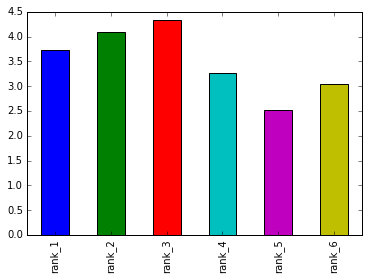

In [28]:
ranking.plot.bar()

We see that **Star Wars: Episode V The Empire Strikes Back** has the highest rating (remember that lower is better) and **Star Wars: Episode III Revenge of the Sith** has the lowest rating. 

### 6. Finding the Most Viewed Movie

In [30]:
movie_seen = star_wars.sum()[3:9]

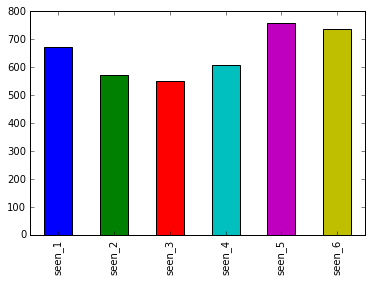

In [31]:
movie_seen.plot.bar()

We see that **Episode V** is the most popular and **Episode III** is the least popular.

### 7. Exploring the Data by Binary Segments

We know which movies the survey population as a whole has ranked the highest. Now let's examine how certain segments of the survey population responded. We will focus on two columns which segment our data into two groups.

* **Do you consider yourself to be a fan of the Star Wars film franchise?** - True or False
* **Gender** - **Male** or **Female**

Let's first segment the data based on Star Wars fans.

In [32]:
fan = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']==True]

In [33]:
fan_rank = fan.iloc[:,9:15].mean()

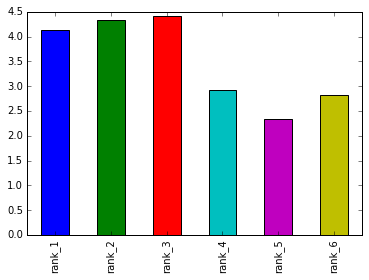

In [34]:
fan_rank.plot.bar()

For Star Wars fans, **Episode V** is still the highest ranked, and **Episode III** is still the lowest ranked.

In [39]:
fan_seen = fan.iloc[:,3:9].sum()

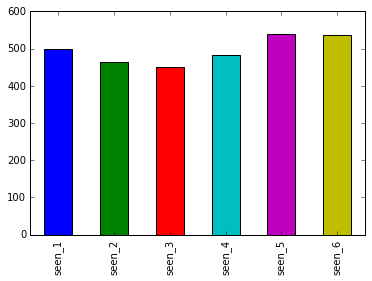

In [40]:
fan_seen.plot.bar()

In [36]:
not_fan = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']==False]

In [37]:
not_fan_rank = not_fan.iloc[:,9:15].mean()

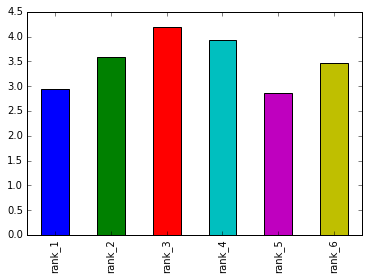

In [38]:
not_fan_rank.plot.bar()

In [41]:
not_fan_seen = not_fan.iloc[:,3:9].sum()

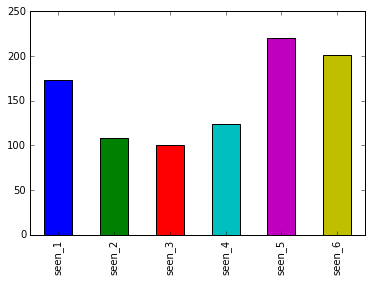

In [42]:
not_fan_seen.plot.bar()

Now let us segment the data based on gender

In [43]:
male = star_wars[star_wars['Gender']=='Male']

In [44]:
male_rank = male.iloc[:,9:15].mean()

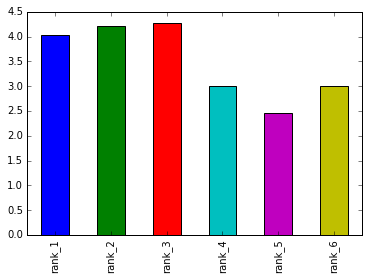

In [45]:
male_rank.plot.bar()

In [46]:
male_seen = male.iloc[:,3:9].sum()

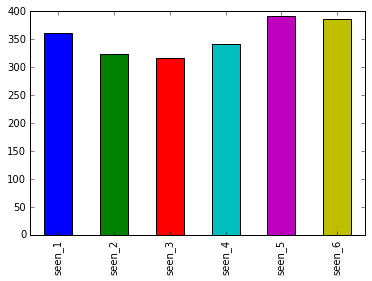

In [47]:
male_seen.plot.bar()

In [48]:
female = star_wars[star_wars['Gender'] == 'Female']

In [49]:
female_rank = female.iloc[:,9:15].mean()

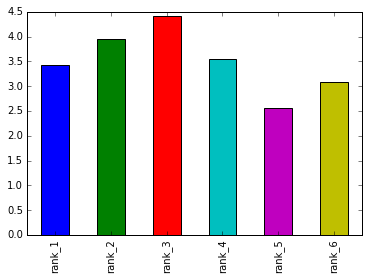

In [50]:
female_rank.plot.bar()

In [51]:
female_seen = female.iloc[:,3:9].sum()

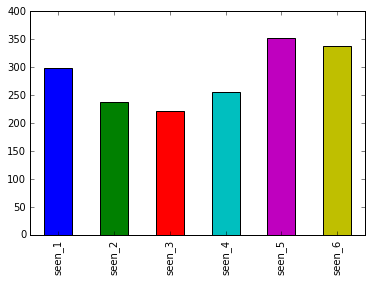

In [53]:
female_seen.plot.bar()

From the above plots we see that overall **Episode 5** is the most popular and **Episode 3** is the least popular. The results do not depend on Gender.

### 8. Next Steps

Now let's segment the data based on **Education**

In [54]:
star_wars['Education'].value_counts()

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

In [55]:
graduate = star_wars[star_wars['Education'] == 'Graduate degree']

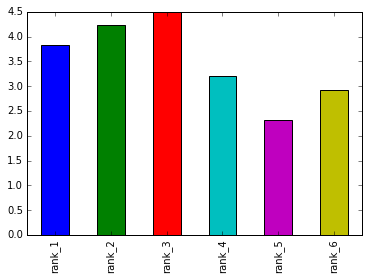

In [56]:
graduate.iloc[:,9:15].mean().plot.bar()

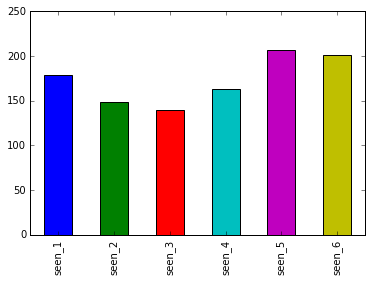

In [57]:
graduate.iloc[:,3:9].sum().plot.bar()

Let's look at **Location (Census Region)**

In [58]:
star_wars['Location (Census Region)'].value_counts()

East North Central    181
Pacific               175
South Atlantic        170
Middle Atlantic       122
West South Central    110
West North Central     93
Mountain               79
New England            75
East South Central     38
Name: Location (Census Region), dtype: int64

Let us figure out the region that see the most Star Wars movies

In [65]:
star_wars['Total_View'] = star_wars['seen_1']*1+star_wars['seen_2']*1+star_wars['seen_3']*1+star_wars['seen_4']*1+star_wars['seen_5']*1+star_wars['seen_6']*1

In [69]:
star_wars.groupby('Location (Census Region)').sum()['Total_View'].sort_values(ascending = False)

Location (Census Region)
Pacific               663
East North Central    624
South Atlantic        603
Middle Atlantic       462
West South Central    358
West North Central    340
Mountain              324
New England           294
East South Central    153
Name: Total_View, dtype: int64

So the Pacific region sees the most Star Wars movies and the East South Central sees the least Star Wars movies.

Now let's look at columns 15 to 29

In [72]:
star_wars.iloc[:,15:29].head()

,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
4,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
5,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably


Let's look at the column names

In [73]:
star_wars.columns[15:29]

Index(['Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28'],
      dtype='object')

From the dataset we have 

* **'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.** -  Han Solo
* **Unnamed: 16** - Luke Skywalker
* **Unnamed: 17** -Princess Leia Organa
* **Unnamed: 18** -Anakin Skywalker
* **Unnamed: 19** -Obi Wan Kenobi
* **Unnamed: 20** -Emperor Palpatine
* **Unnamed: 21** -Darth Vader
* **Unnamed: 22** -Lando Calrissian
* **Unnamed: 23** -Boba Fett
* **Unnamed: 24** -C-3P0
* **Unnamed: 25** -R2D2
* **Unnamed: 26** -Jar Jar Binks
* **Unnamed: 27** -Padme Amidala
* **Unnamed: 28** - Yoda

Let's rename the columns to character names

In [74]:
star_wars = star_wars.rename(columns = {'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.':'Han_Solo',
                                        'Unnamed: 16':'Luke_Skywalker',
                                         'Unnamed: 17': 'Princess_Leia',
                                         'Unnamed: 18':'Anakin_Skywalker',
                                         'Unnamed: 19':'Obi_Wan_Kenobi',
                                         'Unnamed: 20':'Emperor_Palpatine',
                                          'Unnamed: 21':'Darth_Vader',
                                          'Unnamed: 22':'Lando',
                                          'Unnamed: 23':'Boba',
                                          'Unnamed: 24':'C3P0',
                                         'Unnamed: 25':'R2D2',
                                          'Unnamed: 26':'Jar_Jar',
                                          'Unnamed: 27':'Padme',
                                          'Unnamed: 28':'Yoda'})

In [75]:
star_wars.iloc[:,15:29].head()

,Han_Solo,Luke_Skywalker,Princess_Leia,Anakin_Skywalker,Obi_Wan_Kenobi,Emperor_Palpatine,Darth_Vader,Lando,Boba,C3P0,R2D2,Jar_Jar,Padme,Yoda
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
4,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
5,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably


In [76]:
star_wars['Han_Solo'].value_counts()

Very favorably                                 610
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Han_Solo, dtype: int64

Let's convert these ratings to number: 1 being most favorite, and 6 being least favorite

In [77]:
favor_map = {'Very favorably':1,'Somewhat favorably':2,
            'Neither favorably nor unfavorably (neutral)': 3,
            'Unfamiliar (N/A)':4,
             'Somewhat unfavorably': 5,
             'Very unfavorably': 6}

In [80]:
for i in list(range(15,29)):
    star_wars.iloc[:, i] = star_wars.iloc[:,i].map(favor_map)

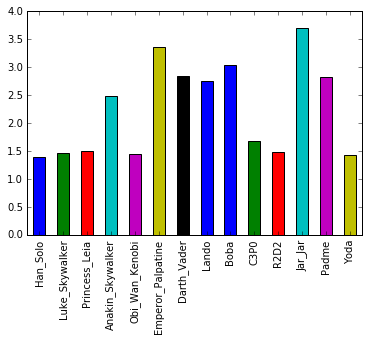

In [82]:
star_wars.iloc[:,15:29].mean().plot.bar()

In [84]:
star_wars.iloc[:,15:29].mean().sort_values()

Han_Solo             1.387214
Yoda                 1.421308
Obi_Wan_Kenobi       1.440000
Luke_Skywalker       1.457280
R2D2                 1.480723
Princess_Leia        1.490975
C3P0                 1.675937
Anakin_Skywalker     2.484812
Lando                2.745122
Padme                2.831695
Darth_Vader          2.842615
Boba                 3.036946
Emperor_Palpatine    3.369779
Jar_Jar              3.695493
dtype: float64

We see that the most favored character is **Han Solo** and the least favored character is **Jar_jar**.